# Майнор по Анализу Данных, Группа ИАД-4
## 09/11/2017 Практика с rnn

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


RND_SEED = 7
plt.style.use('ggplot')

np.random.seed(RND_SEED)

%matplotlib inline

Using Theano backend.
DEBUG: nvcc STDOUT nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp450sqz4t/m91973e5c136ea49268a916ff971b7377.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp450sqz4t/m91973e5c136ea49268a916ff971b7377.exp

Using gpu device 0: GeForce GPU (CNMeM is disabled, cuDNN 5110)
C:\Users\sanek\Anaconda3\lib\site-packages\theano-0.8.2-py3.5.egg\theano\sandbox\cuda\__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


# Прогнозирование временных рядов

In [2]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [3]:
df = pd.read_csv('./monthly-australian-wine-sales.csv')
dataset = df.loc[:, ['sales']].values.astype(np.float32)

Отнормируем данные и разобъем их на обучение и контроль

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[:train_size, :], dataset[train_size:, :]

Переведем их в нужный фоомат

In [5]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [6]:
# [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [7]:
# Создаем сеточку
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\sanek\Anaconda3\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp3m8o4i9r/m8ff56eba275ea5e3adc47f9f70ed24f2.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp3m8o4i9r/m8ff56eba275ea5e3adc47f9f70ed24f2.exp

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp625ozxig/m02e3cf94cecf7e295ce26cf72a939e27.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp625ozxig/m0

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp36sv6ios/me5ad9736ddbbd9fb1ed36e19a50b9a03.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmp36sv6ios/me5ad9736ddbbd9fb1ed36e19a50b9a03.exp

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmpgoimgq8d/mb5db48bb1463be4b1117483e7f3555d7.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmpgoimgq8d/mb5db48bb1463be4b1117483e7f3555d7.exp

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Ste

Epoch 1/100
1s - loss: 0.1298
Epoch 2/100
1s - loss: 0.0533
Epoch 3/100
1s - loss: 0.0378
Epoch 4/100
1s - loss: 0.0362
Epoch 5/100
0s - loss: 0.0362
Epoch 6/100
1s - loss: 0.0362
Epoch 7/100
0s - loss: 0.0361
Epoch 8/100
0s - loss: 0.0361
Epoch 9/100
1s - loss: 0.0360
Epoch 10/100
1s - loss: 0.0358
Epoch 11/100
1s - loss: 0.0357
Epoch 12/100
1s - loss: 0.0358
Epoch 13/100
0s - loss: 0.0357
Epoch 14/100
1s - loss: 0.0358
Epoch 15/100
0s - loss: 0.0359
Epoch 16/100
0s - loss: 0.0360
Epoch 17/100
0s - loss: 0.0355
Epoch 18/100
0s - loss: 0.0357
Epoch 19/100
0s - loss: 0.0355
Epoch 20/100
0s - loss: 0.0356
Epoch 21/100
0s - loss: 0.0355
Epoch 22/100
0s - loss: 0.0357
Epoch 23/100
0s - loss: 0.0356
Epoch 24/100
1s - loss: 0.0354
Epoch 25/100
0s - loss: 0.0359
Epoch 26/100
0s - loss: 0.0358
Epoch 27/100
1s - loss: 0.0356
Epoch 28/100
1s - loss: 0.0354
Epoch 29/100
1s - loss: 0.0358
Epoch 30/100
0s - loss: 0.0357
Epoch 31/100
1s - loss: 0.0358
Epoch 32/100
1s - loss: 0.0359
Epoch 33/100
0s -

In [8]:
# Предсказываем
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Обратное преобразование scaler
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Считаем ошибку
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmpup_3xto8/m99f7473ca093826fad43d98a4e86d0c9.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmpup_3xto8/m99f7473ca093826fad43d98a4e86d0c9.exp

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmps7xj_qtm/ma3cba195219764c6cca6de817c09a2b0.lib и объект C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64/tmps7xj_qtm/ma3cba195219764c6cca6de817c09a2b0.exp

DEBUG: nvcc STDOUT mod.cu
   Создается библиотека C:/Users/sanek/AppData/Local/Theano/compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Ste

Train Score: 4937.37 RMSE
Test Score: 5698.58 RMSE


Нарисуем предсказания

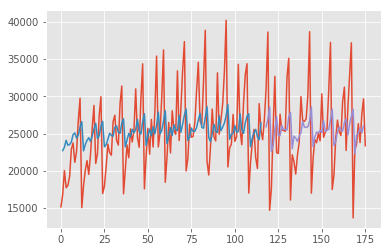

In [9]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

# Тональность отзыва

In [10]:
from keras.datasets import imdb
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [11]:
np.random.seed(RND_SEED)

Загрузим датасет

In [12]:
# 
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)

C:\Users\sanek\Anaconda3\lib\site-packages\keras\datasets\imdb.py:44: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


Необходимо привести все к однообразной форме

In [13]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [16]:
# Создаем модель
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 213,301.0
Trainable params: 213,301
Non-trainable params: 0.0
_________________________________________________________________
None
mod.cu

['nvcc', '-shared', '-O3', '--maxrregcount=32', '-arch=sm_50', '--compiler-bindir', 'C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\bin', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=m18715462c72ed6afcd7ca5d52813ce90,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-IC:\\Users\\sanek\\AppData\\Local\\Theano\\compiledir_Windows-

1 #include <Python.h>
2 #include <iostream>
3 #include "theano_mod_helper.h"
4 #include "cuda_ndarray.cuh"
5 //////////////////////
6 ////  Support Code
7 //////////////////////
8 
9 
10     namespace {
11     struct __struct_compiled_op_m533116516f0283ee900cdfe68923ba01 {
12         PyObject* __ERROR;
13 
14         PyObject* storage_V3;
15 PyObject* storage_V1;
16         
17 
18         __struct_compiled_op_m533116516f0283ee900cdfe68923ba01() {
19             // This is only somewhat safe because we:
20             //  1) Are not a virtual class
21             //  2) Do not use any virtual classes in the members
22             //  3) Deal with mostly POD and pointers
23 
24             // If this changes, we would have to revise this, but for
25             // now I am tired of chasing segfaults because
26             // initialization code had an error and some pointer has
27             // a junk value.
28             memset(this, 0, sizeof(*this));
29         }
30         ~__stru

Exception: ('The following error happened while compiling the node', GpuElemwise{RoundHalfToEven}[(0, 0)](GpuElemwise{Composite{scalar_sigmoid((i0 + i1))}}[(0, 0)].0), '\n', 'nvcc return status', 2, 'for cmd', 'nvcc -shared -O3 --maxrregcount=32 -arch=sm_50 --compiler-bindir C:\\Program Files (x86)\\Microsoft Visual Studio 14.0\\VC\\bin -Xlinker /DEBUG -D HAVE_ROUND -m64 -Xcompiler -DCUDA_NDARRAY_CUH=m18715462c72ed6afcd7ca5d52813ce90,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD -IC:\\Users\\sanek\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64\\cuda_ndarray -IC:\\Users\\sanek\\Anaconda3\\lib\\site-packages\\numpy\\core\\include -IC:\\Users\\sanek\\Anaconda3\\include -IC:\\Users\\sanek\\Anaconda3\\lib\\site-packages\\theano-0.8.2-py3.5.egg\\theano\\gof -IC:\\Users\\sanek\\Anaconda3\\lib\\site-packages\\theano-0.8.2-py3.5.egg\\theano\\sandbox\\cuda -o C:\\Users\\sanek\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64\\tmp66e2s0ei\\m533116516f0283ee900cdfe68923ba01.pyd mod.cu -LC:\\Users\\sanek\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.15063-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.5.4-64\\cuda_ndarray -LC:\\Users\\sanek\\Anaconda3\\libs -LC:\\Users\\sanek\\Anaconda3 -lcudart -lcublas -lcuda_ndarray -lpython35', '[GpuElemwise{RoundHalfToEven}[(0, 0)](<CudaNdarrayType(float32, matrix)>)]')

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Теперь попробуем добавить Dropout (2мя способами) и одномерную конволюцию!

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout